# 분기별 등급화

## 분기별 가중치 적용 데이터 불러오기

In [5]:
import pandas as pd

m_weight_q1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/Monetary_org_2014_q1.csv', index_col = 0)
m_weight_q2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/Monetary_org_2014_q2.csv', index_col = 0)
m_weight_q3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/Monetary_org_2014_q3.csv', index_col = 0)
m_weight_q4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/Monetary_org_2014_q4.csv', index_col = 0)
m_weight_q5 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/Monetary_org_2015_q1.csv', index_col = 0)
m_weight_q6 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/Monetary_org_2015_q2.csv', index_col = 0)
m_weight_q7 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/Monetary_org_2015_q3.csv', index_col = 0)
m_weight_q8 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/Monetary_org_2015_q4.csv', index_col = 0)
m_weight_q8

,Monetary_가구인테리어/잡화_고가,Monetary_가구인테리어/잡화_저가,Monetary_가구인테리어/잡화_중가,Monetary_가전/레저취미/멀티샵_고가,Monetary_가전/레저취미/멀티샵_저가,Monetary_가전/레저취미/멀티샵_중가,Monetary_교육문화/아동_고가,Monetary_교육문화/아동_저가,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.000000,40465.236321,110237.050222,119805.491368,0.000000,0.000000,0.000000,0.000000,0.000000,258463.009263,5519.503468,3.672185e+05,1.093779e+05,0.000000,2.629269e+06,120221.283322,0.000000,625313.031262
2,0.000000,304898.120091,0.000000,427178.460020,0.000000,0.000000,0.000000,0.000000,0.000000,287942.528815,0.000000,1.568272e+06,4.845374e+06,0.000000,2.311185e+06,0.000000,0.000000,386787.232395
3,0.000000,1565.386318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145628.213434,1.081234e+05,0.000000e+00,7013.903359,0.000000e+00,0.000000,0.000000,0.000000
4,0.000000,97335.721254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123301.228615,44522.666242,6.539997e+05,0.000000e+00,80929.654144,4.357376e+05,0.000000,0.000000,48293.626556
6,24073.651281,73494.887631,46318.088328,31149.427756,36391.947070,0.000000,0.000000,1849.911647,0.000000,358123.625452,133901.759315,7.471081e+05,8.012278e+05,141303.176136,4.972666e+05,0.000000,4400.883954,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13379.015958,28544.002592,5.076078e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
19334,0.000000,0.000000,0.000000,0.000000,25857.436076,0.000000,135979.051884,0.000000,101631.027196,8690.921748,52355.578925,7.005174e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
19335,0.000000,26063.682195,0.000000,0.000000,68091.248333,0.000000,0.000000,58126.171222,583594.005833,41855.653176,99495.525963,8.784988e+05,0.000000e+00,169502.664513,0.000000e+00,0.000000,6948.764137,0.000000


## 데이터 탐색

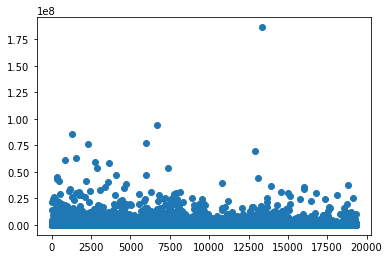

In [21]:
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.1f}'.format

plt.scatter(m_weight_q8.iloc[:,0].index, m_weight_q8.iloc[:,0])

In [24]:
df_col.describe()['25%']

20569.507607287127

## 등급화 사용자함수 생성 및 저장
```
- 0값 제외 순위 매김
상위 1%: 1등급
상위 5%: 2등급
상위 10% 3등급
상위 20% 4등급
상위 40% 5등급
상위 70% 6등급
상위 100% 7등급

- 구매 없음: 8등급

```

In [67]:
import numpy as np
pd.options.display.float_format = '{:.1f}'.format

df_li = [m_weight_q1, m_weight_q2, m_weight_q3, m_weight_q4, m_weight_q5, m_weight_q6, m_weight_q7, m_weight_q8]



def make_weight_grade_df(df_li):
    # 데이터프레임별
    for idx in range(len(df_li)):
        df = df_li[idx]
        display(df)

        # 빈 데이터프레임 만들기
        grade_columns = [column + '_등급' for column in df.columns]
        grade_df = pd.DataFrame(columns = grade_columns, index = df.index)

        # 데이터프레임 내 컬럼별
        for i in range(18):
            df_col = df.iloc[:,i]

    #         # 이상치 검출
    #         q3 = df_col.describe()['75%']
    #         q1 = df_col.describe()['25%']
    #         iqr = q3 - q1
    #         low_whisker = q1 - 1.5 * iqr
    #         high_whisker = q3 + 1.5 * iqr
    #         print(low_whisker, high_whisker)

            # 0인 값은 제외하고 등급화 기준 정하기:상위 1%, 5%, 10%, 20%, 40%, 70%, 0번 구매
            df_col_0 = df_col[(df_col > 0)]
            grade_기준 = np.percentile(df_col_0, list([30,60,80,90,95,99]))
    #         ##상위 1% 확인
    #         print(df_col[df_col > grade_기준[5]])

    #         ## 시각화
    #         plt.scatter(df_col.index, df_col)
    #         plt.show()

            def grade_go(x, grade_기준):
                y = 8
                if x > grade_기준[5]: y = 1
                elif x > grade_기준[4] : y = 2
                elif x > grade_기준[3] : y = 3
                elif x > grade_기준[2] : y = 4
                elif x > grade_기준[1] : y = 5
                elif x > grade_기준[0] : y = 6
                elif x <= grade_기준[0] and x > 0 : y = 7
                return y  

    #         display(pd.DataFrame(grade_기준))
            grade_df.iloc[:,i] = df.iloc[:,i].apply(lambda x: grade_go(x, grade_기준))

        display(grade_df)
        # 저장하기 
        grade_df.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/2. 등급화 이후/Monetary_org_등급화_q{idx+1}.csv')

make_weight_grade_df(df_li)   

,Monetary_가구인테리어/잡화_고가,Monetary_가구인테리어/잡화_저가,Monetary_가구인테리어/잡화_중가,Monetary_가전/레저취미/멀티샵_고가,Monetary_가전/레저취미/멀티샵_저가,Monetary_가전/레저취미/멀티샵_중가,Monetary_교육문화/아동_고가,Monetary_교육문화/아동_저가,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0,405723.6,0.0,758358.5,0.0,69247.3,0.0,0.0,108156.9,951553.9,0.0,757129.1,2407699.1,0.0,3197202.1,208572.2,0.0,494024.6
2,0.0,583637.8,165551.6,2595070.1,32409.9,0.0,0.0,0.0,118770.4,480907.5,0.0,2381060.0,6663384.0,0.0,334618.2,1260825.9,0.0,142828.5
3,0.0,622.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20188.7,186088.6,100209.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,199134.7,209169.0,0.0,0.0,149534.1,0.0,0.0,0.0,7408.7,6620.8,591800.5,33417.4,19140.0,81829.8,0.0,0.0,50447.1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246042.7,357210.2,519514.7,442214.9,96338.2,426316.9,0.0,51997.2,36784.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0,0.0,0.0,0.0,23377.6,0.0,0.0,2810.5,23666.5,31894.4,34738.5,447215.9,0.0,0.0,44204.6,0.0,5711.8,0.0
19334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6557.7,11729.0,0.0,65904.8,705051.8,0.0,47850.1,0.0,0.0,0.0,0.0
19335,0.0,25954.7,0.0,0.0,0.0,0.0,96426.5,26605.6,107723.2,66798.6,37479.9,270636.9,0.0,47850.1,0.0,0.0,264710.3,0.0


,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,8,2,8,6,8,7,8,8,6,3,8,5,3,8,4,6,8,3
2,8,2,6,4,5,8,8,8,6,4,8,2,2,8,6,3,8,5
3,8,7,8,8,8,8,8,8,8,7,5,7,8,8,8,8,8,8
4,8,4,6,8,8,6,8,8,8,7,7,6,7,7,7,8,8,6
6,8,8,8,8,8,8,8,8,8,5,4,6,6,5,6,8,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,8,8,8,6,8,8,7,7,7,7,6,8,8,7,8,7,8
19334,8,8,8,8,8,8,8,6,7,8,6,5,8,6,8,8,8,8
19335,8,6,8,8,8,8,5,5,6,7,7,7,8,6,8,8,1,8


,Monetary_가구인테리어/잡화_고가,Monetary_가구인테리어/잡화_저가,Monetary_가구인테리어/잡화_중가,Monetary_가전/레저취미/멀티샵_고가,Monetary_가전/레저취미/멀티샵_저가,Monetary_가전/레저취미/멀티샵_중가,Monetary_교육문화/아동_고가,Monetary_교육문화/아동_저가,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0,396977.7,929676.7,1408528.9,0.0,0.0,0.0,0.0,72849.9,2872479.8,747.4,521241.2,1455275.5,0.0,3707521.0,0.0,0.0,0.0
2,0.0,529204.7,285812.4,1481465.7,0.0,236453.0,0.0,0.0,348299.9,792613.8,0.0,1772862.3,2887971.9,0.0,822403.8,1130607.1,0.0,115137.7
3,0.0,1649.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28543.0,263918.2,178181.0,0.0,0.0,83669.0,0.0,0.0,0.0
4,0.0,150865.2,303519.2,116691.0,5054.0,136807.4,0.0,0.0,0.0,76022.1,62879.7,910305.3,782360.5,15053.8,1260055.6,0.0,5983.8,0.0
6,39406.0,112159.2,268490.7,0.0,14384.4,0.0,0.0,0.0,0.0,238634.5,228323.9,672896.8,381095.6,121434.4,972652.4,96520.7,47072.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0,1649.4,0.0,0.0,0.0,0.0,0.0,0.0,25297.8,127376.2,29666.0,750280.4,0.0,0.0,0.0,0.0,0.0,0.0
19334,0.0,0.0,0.0,0.0,15453.5,0.0,0.0,33274.0,32393.1,117931.5,307231.4,2144247.6,0.0,43134.3,0.0,0.0,35503.6,0.0
19335,0.0,63007.1,0.0,0.0,79697.2,59922.7,83358.4,329805.8,204102.2,422814.4,162331.2,843808.9,0.0,375754.1,45181.3,0.0,156215.9,46726.0


,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,8,2,3,5,8,8,8,8,6,1,7,6,4,8,3,8,8,8
2,8,2,6,5,8,6,8,8,5,3,8,2,3,8,5,3,8,5
3,8,7,8,8,8,8,8,8,8,7,5,7,8,8,7,8,8,8
4,8,4,5,7,7,6,8,8,8,7,6,5,5,7,5,8,7,8
6,7,5,6,8,6,8,8,8,8,5,5,6,6,5,5,6,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,7,8,8,8,8,8,8,7,6,7,5,8,8,8,8,8,8
19334,8,8,8,8,6,8,8,5,7,6,4,2,8,6,8,8,5,8
19335,8,5,8,8,4,7,5,2,5,4,5,5,8,3,7,8,2,6


,Monetary_가구인테리어/잡화_고가,Monetary_가구인테리어/잡화_저가,Monetary_가구인테리어/잡화_중가,Monetary_가전/레저취미/멀티샵_고가,Monetary_가전/레저취미/멀티샵_저가,Monetary_가전/레저취미/멀티샵_중가,Monetary_교육문화/아동_고가,Monetary_교육문화/아동_저가,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,267033.5,59902.0,155860.0,0.0,0.0,12621.0,0.0,0.0,0.0,209281.0,25571.8,869573.0,3019305.2,0.0,5012430.5,1587091.6,0.0,1378011.9
2,0.0,711480.1,0.0,2567349.3,0.0,0.0,0.0,0.0,129283.8,131452.1,0.0,1604463.5,4032181.5,0.0,3723412.5,1419193.8,0.0,2617474.4
3,0.0,8120.3,0.0,0.0,27286.2,0.0,0.0,0.0,0.0,23785.9,256000.7,300282.0,0.0,0.0,0.0,0.0,6812.7,0.0
4,0.0,229957.7,0.0,372023.0,0.0,242221.8,0.0,0.0,0.0,21862.0,20358.0,453987.6,412655.5,61930.7,762833.2,109337.0,0.0,105947.1
6,64345.4,34128.8,54118.1,0.0,0.0,0.0,0.0,0.0,0.0,448193.8,274164.1,539630.1,976237.9,120917.3,870758.6,0.0,45736.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0,1176.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5072.0,14481.6,527202.0,0.0,0.0,0.0,0.0,0.0,0.0
19334,0.0,15887.6,0.0,0.0,3043.1,0.0,47149.6,12173.0,23001.7,109082.9,329672.6,1877324.9,0.0,41637.6,0.0,0.0,3179.3,0.0
19335,0.0,346348.7,0.0,0.0,16939.7,16573.1,6972.0,158218.1,237972.3,397898.0,117812.5,775655.2,0.0,55937.4,0.0,0.0,170817.7,0.0


,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,6,6,6,8,8,7,8,8,8,5,7,5,3,8,3,3,8,2
2,8,1,8,4,8,8,8,8,6,6,8,2,2,8,3,3,8,1
3,8,7,8,8,6,8,8,8,8,7,5,7,8,8,8,8,7,8
4,8,3,8,6,8,6,8,8,8,7,7,6,6,6,5,6,8,5
6,7,6,7,8,8,8,8,8,8,4,5,6,5,5,5,8,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,7,8,8,8,8,8,8,8,7,7,6,8,8,8,8,8,8
19334,8,7,8,8,7,8,6,6,7,6,4,2,8,6,8,8,7,8
19335,8,2,8,8,6,7,7,2,5,4,6,5,8,6,8,8,2,8


,Monetary_가구인테리어/잡화_고가,Monetary_가구인테리어/잡화_저가,Monetary_가구인테리어/잡화_중가,Monetary_가전/레저취미/멀티샵_고가,Monetary_가전/레저취미/멀티샵_저가,Monetary_가전/레저취미/멀티샵_중가,Monetary_교육문화/아동_고가,Monetary_교육문화/아동_저가,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0,818290.0,193192.7,5362493.8,0.0,44558.9,0.0,0.0,0.0,476926.0,62786.8,1659179.2,770000.5,14207.7,3497610.8,6355948.7,57779.0,370787.7
2,349551.0,252442.0,0.0,350598.8,28730.5,0.0,0.0,0.0,0.0,370794.5,2490.8,1597236.8,1981999.3,0.0,1127684.2,34037.2,0.0,78298.3
3,0.0,743.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51884.5,151828.2,204665.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,85548.4,0.0,0.0,0.0,76965.4,0.0,0.0,0.0,8690.9,55503.9,330218.2,209223.2,58808.9,417491.4,265315.9,20730.5,52765.3
6,0.0,48292.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250468.2,252171.6,571815.7,783148.8,154216.0,429209.0,86402.2,50737.6,36488.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0,1369.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39049.3,42571.9,397072.8,0.0,0.0,0.0,0.0,0.0,0.0
19334,0.0,52910.1,0.0,0.0,18196.0,0.0,28111.7,68826.4,50815.5,106858.1,785042.8,1622411.9,0.0,41229.2,0.0,0.0,114098.7,0.0
19335,0.0,77408.4,0.0,0.0,25187.1,0.0,0.0,139454.1,235354.3,57758.2,152268.6,1044738.5,41088.6,124191.1,0.0,0.0,77884.1,44626.9


,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,8,1,6,2,8,7,8,8,8,4,7,2,5,7,3,1,4,3
2,6,3,8,6,6,8,8,8,8,5,7,2,4,8,5,7,8,5
3,8,7,8,8,8,8,8,8,8,7,6,7,8,8,8,8,8,8
4,8,5,8,8,8,7,8,8,8,7,7,7,6,6,6,5,5,6
6,8,6,8,8,8,8,8,8,8,5,5,6,5,5,6,6,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,7,8,8,8,8,8,8,8,7,7,7,8,8,8,8,8,8
19334,8,6,8,8,6,8,6,4,6,7,1,2,8,6,8,8,2,8
19335,8,5,8,8,6,8,8,3,5,7,6,4,7,5,8,8,3,6


,Monetary_가구인테리어/잡화_고가,Monetary_가구인테리어/잡화_저가,Monetary_가구인테리어/잡화_중가,Monetary_가전/레저취미/멀티샵_고가,Monetary_가전/레저취미/멀티샵_저가,Monetary_가전/레저취미/멀티샵_중가,Monetary_교육문화/아동_고가,Monetary_교육문화/아동_저가,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,570579.2,57785.5,769263.3,151849.1,0.0,402838.8,0.0,0.0,0.0,264699.6,46302.1,1427370.7,1346745.3,0.0,3827846.9,484418.3,11414.0,301715.9
2,1749598.6,267229.4,373009.9,2103878.5,90110.1,0.0,0.0,0.0,1083331.3,492224.2,0.0,1368958.7,8604908.3,0.0,1042363.9,2300129.7,0.0,0.0
3,0.0,155.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5093.5,206103.1,74215.2,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,33242.8,0.0,0.0,0.0,31692.1,0.0,0.0,0.0,47452.7,22531.4,860631.6,80402.7,8187.7,639866.0,34047.8,0.0,0.0
6,0.0,135483.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329561.8,333797.4,778899.1,722619.3,66299.0,206013.8,1124752.1,25461.3,66211.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20392.4,43624.8,784230.7,0.0,0.0,0.0,0.0,0.0,0.0
19334,0.0,17649.2,0.0,0.0,0.0,0.0,392926.3,34943.3,166916.6,43294.5,136142.0,865274.2,0.0,94955.9,0.0,0.0,12295.0,0.0
19335,0.0,42565.7,0.0,0.0,27415.6,41728.0,0.0,300886.9,153967.8,68567.4,175320.6,1010684.4,0.0,293959.2,56129.5,0.0,12382.1,24487.9


,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,6,5,4,7,8,5,8,8,8,5,7,3,4,8,4,5,6,3
2,5,3,5,5,4,8,8,8,3,4,8,3,2,8,5,2,8,8
3,8,7,8,8,8,8,8,8,8,7,6,7,8,8,8,8,8,8
4,8,6,8,8,8,7,8,8,8,7,7,5,7,7,6,7,8,8
6,8,4,8,8,8,8,8,8,8,5,4,5,5,6,6,4,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,8,8,8,8,8,8,8,8,7,7,5,8,8,8,8,8,8
19334,8,6,8,8,8,8,2,5,5,7,6,5,8,6,8,8,6,8
19335,8,6,8,8,6,7,8,1,5,7,6,4,8,4,7,8,6,7


,Monetary_가구인테리어/잡화_고가,Monetary_가구인테리어/잡화_저가,Monetary_가구인테리어/잡화_중가,Monetary_가전/레저취미/멀티샵_고가,Monetary_가전/레저취미/멀티샵_저가,Monetary_가전/레저취미/멀티샵_중가,Monetary_교육문화/아동_고가,Monetary_교육문화/아동_저가,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,255835.8,21992.0,4584.9,0.0,0.0,87226.2,0.0,0.0,0.0,403533.0,55176.6,905621.6,2008447.9,0.0,4747265.6,452038.8,0.0,0.0
2,0.0,536165.1,0.0,630160.8,0.0,0.0,0.0,0.0,0.0,125486.6,4982.5,911269.3,3696531.4,173079.1,1663340.3,186285.0,0.0,1708494.8
3,0.0,2199.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215763.9,94748.3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,112291.2,21640.6,0.0,0.0,30927.8,0.0,72312.1,0.0,133130.3,80635.4,687839.8,294473.3,25892.6,532344.2,0.0,0.0,0.0
6,59614.2,141848.4,45390.3,0.0,0.0,0.0,0.0,0.0,0.0,126499.1,111230.2,395197.4,1045624.3,80387.6,892330.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59348.9,24494.2,479640.3,0.0,0.0,0.0,0.0,0.0,0.0
19334,0.0,12095.6,0.0,0.0,0.0,0.0,0.0,41605.6,8389.8,61238.6,102409.1,450569.7,0.0,101061.5,0.0,0.0,2991.9,0.0
19335,0.0,140748.8,627945.5,0.0,69589.3,149420.1,24893.3,211486.5,279590.6,144884.6,116713.0,811708.8,55200.5,116637.2,0.0,0.0,88220.5,0.0


,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,6,6,7,8,8,7,8,8,8,5,7,5,4,8,3,5,8,8
2,8,2,8,5,8,8,8,8,8,6,7,5,2,5,5,6,8,1
3,8,7,8,8,8,8,8,8,8,8,5,7,8,8,8,8,8,8
4,8,5,7,8,8,7,8,4,8,6,6,6,6,7,6,8,8,8
6,7,4,7,8,8,8,8,8,8,6,6,7,5,6,5,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,8,8,8,8,8,8,8,8,7,7,6,8,8,8,8,8,8
19334,8,7,8,8,8,8,8,5,7,7,6,7,8,6,8,8,7,8
19335,8,4,4,8,4,6,7,2,5,6,6,5,7,5,8,8,2,8


,Monetary_가구인테리어/잡화_고가,Monetary_가구인테리어/잡화_저가,Monetary_가구인테리어/잡화_중가,Monetary_가전/레저취미/멀티샵_고가,Monetary_가전/레저취미/멀티샵_저가,Monetary_가전/레저취미/멀티샵_중가,Monetary_교육문화/아동_고가,Monetary_교육문화/아동_저가,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0,0.0,959026.1,127010.1,0.0,156233.1,0.0,0.0,0.0,104762.9,2134.2,480340.6,563641.5,0.0,4894986.9,1968065.3,0.0,0.0
2,0.0,948781.4,0.0,5158661.7,0.0,0.0,0.0,0.0,83993.0,398571.3,1949.1,893624.1,3132541.7,44161.1,4439250.1,873263.4,0.0,98130.3
3,0.0,2353.7,0.0,0.0,2333.0,0.0,0.0,0.0,0.0,81812.1,152865.6,157532.6,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,70376.0,184001.4,0.0,3570.5,175929.5,0.0,0.0,0.0,48297.6,52618.1,647523.0,35456.6,111138.7,994949.2,64508.8,0.0,0.0
6,176103.2,35188.0,189413.2,0.0,0.0,0.0,0.0,1261.5,0.0,674561.3,184239.8,591148.2,546031.3,160977.7,1179745.8,0.0,7630.2,39837.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.3,18545.4,218515.8,0.0,0.0,0.0,0.0,0.0,0.0
19334,0.0,0.0,0.0,0.0,0.0,0.0,27651.7,3153.6,261674.9,0.0,37353.9,36176.2,0.0,0.0,204610.1,0.0,0.0,0.0
19335,0.0,85675.1,0.0,0.0,145052.8,0.0,38286.9,136973.1,278683.8,48691.1,117251.2,648357.5,0.0,48366.9,0.0,0.0,27378.1,0.0


,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,8,8,3,7,8,6,8,8,8,6,7,6,5,8,3,2,8,8
2,8,1,8,3,8,8,8,8,6,4,7,5,3,6,3,4,8,5
3,8,7,8,8,7,8,8,8,8,7,6,7,8,8,8,8,8,8
4,8,5,6,8,7,6,8,8,8,7,7,6,7,5,5,7,8,8
6,7,6,6,8,8,8,8,7,8,3,6,6,5,5,5,8,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,8,8,8,8,8,8,8,8,7,7,7,8,8,8,8,8,8
19334,8,8,8,8,8,8,7,7,5,8,7,7,8,8,6,8,8,8
19335,8,5,8,8,3,8,6,2,5,7,6,6,8,6,8,8,5,8


,Monetary_가구인테리어/잡화_고가,Monetary_가구인테리어/잡화_저가,Monetary_가구인테리어/잡화_중가,Monetary_가전/레저취미/멀티샵_고가,Monetary_가전/레저취미/멀티샵_저가,Monetary_가전/레저취미/멀티샵_중가,Monetary_교육문화/아동_고가,Monetary_교육문화/아동_저가,Monetary_교육문화/아동_중가,Monetary_식품/생활_고가,Monetary_식품/생활_저가,Monetary_식품/생활_중가,Monetary_의류/이미용_고가,Monetary_의류/이미용_저가,Monetary_의류/이미용_중가,Monetary_침구/주방_고가,Monetary_침구/주방_저가,Monetary_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0,40465.2,110237.1,119805.5,0.0,0.0,0.0,0.0,0.0,258463.0,5519.5,367218.5,109377.9,0.0,2629269.0,120221.3,0.0,625313.0
2,0.0,304898.1,0.0,427178.5,0.0,0.0,0.0,0.0,0.0,287942.5,0.0,1568271.8,4845373.9,0.0,2311184.7,0.0,0.0,386787.2
3,0.0,1565.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145628.2,108123.4,0.0,7013.9,0.0,0.0,0.0,0.0
4,0.0,97335.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123301.2,44522.7,653999.7,0.0,80929.7,435737.6,0.0,0.0,48293.6
6,24073.7,73494.9,46318.1,31149.4,36391.9,0.0,0.0,1849.9,0.0,358123.6,133901.8,747108.1,801227.8,141303.2,497266.6,0.0,4400.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13379.0,28544.0,507607.8,0.0,0.0,0.0,0.0,0.0,0.0
19334,0.0,0.0,0.0,0.0,25857.4,0.0,135979.1,0.0,101631.0,8690.9,52355.6,70051.7,0.0,0.0,0.0,0.0,0.0,0.0
19335,0.0,26063.7,0.0,0.0,68091.2,0.0,0.0,58126.2,583594.0,41855.7,99495.5,878498.8,0.0,169502.7,0.0,0.0,6948.8,0.0


,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,8,6,7,7,8,8,8,8,8,5,7,7,7,8,4,6,8,2
2,8,2,8,6,8,8,8,8,8,5,8,2,2,8,4,8,8,3
3,8,7,8,8,8,8,8,8,8,8,6,7,8,7,8,8,8,8
4,8,5,8,8,8,8,8,8,8,6,7,6,8,6,6,8,8,6
6,7,5,7,7,5,8,8,7,8,5,6,5,5,5,6,8,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,8,8,8,8,8,8,8,8,7,7,6,8,8,8,8,8,8
19334,8,8,8,8,6,8,4,8,6,7,7,7,8,8,8,8,8,8
19335,8,6,8,8,4,8,8,4,4,7,6,5,8,5,8,8,6,8


# 변동폭 계산

## 분기별 등급화 적용 데이터 불러오기

In [70]:
m_grade_q1 = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/2. 등급화 이후/Monetary_org_등급화_q1.csv', index_col = 0)
m_grade_q2 = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/2. 등급화 이후/Monetary_org_등급화_q2.csv', index_col = 0)
m_grade_q3 = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/2. 등급화 이후/Monetary_org_등급화_q3.csv', index_col = 0)
m_grade_q4 = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/2. 등급화 이후/Monetary_org_등급화_q4.csv', index_col = 0)
m_grade_q5 = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/2. 등급화 이후/Monetary_org_등급화_q5.csv', index_col = 0)
m_grade_q6 = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/2. 등급화 이후/Monetary_org_등급화_q6.csv', index_col = 0)
m_grade_q7 = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/2. 등급화 이후/Monetary_org_등급화_q7.csv', index_col = 0)
m_grade_q8 = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본_가중치 계산/2. 등급화 이후/Monetary_org_등급화_q8.csv', index_col = 0)
m_grade_q8

,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,8,6,7,7,8,8,8,8,8,5,7,7,7,8,4,6,8,2
2,8,2,8,6,8,8,8,8,8,5,8,2,2,8,4,8,8,3
3,8,7,8,8,8,8,8,8,8,8,6,7,8,7,8,8,8,8
4,8,5,8,8,8,8,8,8,8,6,7,6,8,6,6,8,8,6
6,7,5,7,7,5,8,8,7,8,5,6,5,5,5,6,8,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,8,8,8,8,8,8,8,8,7,7,6,8,8,8,8,8,8
19334,8,8,8,8,6,8,4,8,6,7,7,7,8,8,8,8,8,8
19335,8,6,8,8,4,8,8,4,4,7,6,5,8,5,8,8,6,8


#### 연습

In [72]:
m_grade_q1

,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,8,2,8,6,8,7,8,8,6,3,8,5,3,8,4,6,8,3
2,8,2,6,4,5,8,8,8,6,4,8,2,2,8,6,3,8,5
3,8,7,8,8,8,8,8,8,8,7,5,7,8,8,8,8,8,8
4,8,4,6,8,8,6,8,8,8,7,7,6,7,7,7,8,8,6
6,8,8,8,8,8,8,8,8,8,5,4,6,6,5,6,8,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,8,8,8,6,8,8,7,7,7,7,6,8,8,7,8,7,8
19334,8,8,8,8,8,8,8,6,7,8,6,5,8,6,8,8,8,8
19335,8,6,8,8,8,8,5,5,6,7,7,7,8,6,8,8,1,8


In [73]:
m_grade_q2

,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,8,2,3,5,8,8,8,8,6,1,7,6,4,8,3,8,8,8
2,8,2,6,5,8,6,8,8,5,3,8,2,3,8,5,3,8,5
3,8,7,8,8,8,8,8,8,8,7,5,7,8,8,7,8,8,8
4,8,4,5,7,7,6,8,8,8,7,6,5,5,7,5,8,7,8
6,7,5,6,8,6,8,8,8,8,5,5,6,6,5,5,6,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,8,7,8,8,8,8,8,8,7,6,7,5,8,8,8,8,8,8
19334,8,8,8,8,6,8,8,5,7,6,4,2,8,6,8,8,5,8
19335,8,5,8,8,4,7,5,2,5,4,5,5,8,3,7,8,2,6


In [75]:
m_grade_q2 - m_grade_q1

,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,0,-5,-1,0,1,0,0,0,-2,-1,1,1,0,-1,2,0,5
2,0,0,0,1,3,-2,0,0,-1,-1,0,0,1,0,-1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0
4,0,0,-1,-1,-1,0,0,0,0,0,-1,-1,-2,0,-2,0,-1,2
6,-1,-3,-2,0,-2,0,0,0,0,0,1,0,0,0,-1,-2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,-1,0,0,2,0,0,1,0,-1,0,-1,0,0,1,0,1,0
19334,0,0,0,0,-2,0,0,-1,0,-2,-2,-3,0,0,0,0,-3,0
19335,0,-1,0,0,-4,-1,0,-3,-1,-3,-2,-2,0,-3,-1,0,1,-2


In [74]:
abs(m_grade_q2 - m_grade_q1)

,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,0,5,1,0,1,0,0,0,2,1,1,1,0,1,2,0,5
2,0,0,0,1,3,2,0,0,1,1,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,1,1,0,0,0,0,0,1,1,2,0,2,0,1,2
6,1,3,2,0,2,0,0,0,0,0,1,0,0,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,1,0,0,2,0,0,1,0,1,0,1,0,0,1,0,1,0
19334,0,0,0,0,2,0,0,1,0,2,2,3,0,0,0,0,3,0
19335,0,1,0,0,4,1,0,3,1,3,2,2,0,3,1,0,1,2


### 2분기별 변동폭 구하는 사용자함수 생성 및 적용

In [78]:
grade_df_li = [m_grade_q1, m_grade_q2, m_grade_q3, m_grade_q4, m_grade_q5, m_grade_q6, m_grade_q7, m_grade_q8]

def change_2_quarter(grade_df_li):
    for i in range(7):
        grade_df_q1 = grade_df_li[i]
        grade_df_q2 = grade_df_li[i+1]
        
        grade_df = grade_df_q2 - grade_df_q1
        grade_df.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/1. 변동폭/Monetary_등급화 변동폭 계산_q{i+1}_q{i+2}.csv')
        
        grade_df_abs = abs(m_grade_q2 - m_grade_q1)
        grade_df_abs.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/2. 절대변동폭/Monetary_등급화 절대변동폭 계산_q{i+1}_q{i+2}.csv')
    
change_2_quarter(grade_df_li)

### 3분기별 변동폭 구하는 사용자함수 생성 및 적용

#### 분기 간 변동폭 계산

In [4]:
import pandas as pd
m_grade_q2_q1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/1. 변동폭/Monetary_등급화 변동폭 계산_q1_q2.csv', index_col = 0)
m_grade_q3_q2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/1. 변동폭/Monetary_등급화 변동폭 계산_q2_q3.csv', index_col = 0)
m_grade_q4_q3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/1. 변동폭/Monetary_등급화 변동폭 계산_q3_q4.csv', index_col = 0)
m_grade_q5_q4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/1. 변동폭/Monetary_등급화 변동폭 계산_q4_q5.csv', index_col = 0)
m_grade_q6_q5 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/1. 변동폭/Monetary_등급화 변동폭 계산_q5_q6.csv', index_col = 0)
m_grade_q7_q6 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/1. 변동폭/Monetary_등급화 변동폭 계산_q6_q7.csv', index_col = 0)
m_grade_q8_q7 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/1. 변동폭/Monetary_등급화 변동폭 계산_q7_q8.csv', index_col = 0)
m_grade_q8_q7

,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,-2,4,0,0,2,0,0,0,-1,0,1,2,0,1,4,0,-6
2,0,1,0,3,0,0,0,0,2,1,1,-3,-1,2,1,4,0,-2
3,0,0,0,0,1,0,0,0,0,1,0,0,0,-1,0,0,0,0
4,0,0,2,0,1,2,0,0,0,-1,0,0,1,1,1,1,0,-2
6,0,-1,1,-1,-3,0,0,0,0,2,0,-1,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0
19334,0,0,0,0,-2,0,-3,1,1,-1,0,0,0,0,2,0,0,0
19335,0,1,0,0,1,0,2,2,-1,0,0,-1,0,-1,0,0,1,0


#### 분기 간 절대변동폭 계산

In [5]:
m_grade_q2_q1_abs = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/2. 절대변동폭/Monetary_등급화 절대변동폭 계산_q1_q2.csv', index_col = 0)
m_grade_q3_q2_abs = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/2. 절대변동폭/Monetary_등급화 절대변동폭 계산_q2_q3.csv', index_col = 0)
m_grade_q4_q3_abs = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/2. 절대변동폭/Monetary_등급화 절대변동폭 계산_q3_q4.csv', index_col = 0)
m_grade_q5_q4_abs = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/2. 절대변동폭/Monetary_등급화 절대변동폭 계산_q4_q5.csv', index_col = 0)
m_grade_q6_q5_abs = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/2. 절대변동폭/Monetary_등급화 절대변동폭 계산_q5_q6.csv', index_col = 0)
m_grade_q7_q6_abs = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/2. 절대변동폭/Monetary_등급화 절대변동폭 계산_q6_q7.csv', index_col = 0)
m_grade_q8_q7_abs = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/2. 절대변동폭/Monetary_등급화 절대변동폭 계산_q7_q8.csv', index_col = 0)
m_grade_q8_q7_abs

,Monetary_가구인테리어/잡화_고가_등급,Monetary_가구인테리어/잡화_저가_등급,Monetary_가구인테리어/잡화_중가_등급,Monetary_가전/레저취미/멀티샵_고가_등급,Monetary_가전/레저취미/멀티샵_저가_등급,Monetary_가전/레저취미/멀티샵_중가_등급,Monetary_교육문화/아동_고가_등급,Monetary_교육문화/아동_저가_등급,Monetary_교육문화/아동_중가_등급,Monetary_식품/생활_고가_등급,Monetary_식품/생활_저가_등급,Monetary_식품/생활_중가_등급,Monetary_의류/이미용_고가_등급,Monetary_의류/이미용_저가_등급,Monetary_의류/이미용_중가_등급,Monetary_침구/주방_고가_등급,Monetary_침구/주방_저가_등급,Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,0,5,1,0,1,0,0,0,2,1,1,1,0,1,2,0,5
2,0,0,0,1,3,2,0,0,1,1,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,1,1,0,0,0,0,0,1,1,2,0,2,0,1,2
6,1,3,2,0,2,0,0,0,0,0,1,0,0,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,1,0,0,2,0,0,1,0,1,0,1,0,0,1,0,1,0
19334,0,0,0,0,2,0,0,1,0,2,2,3,0,0,0,0,3,0
19335,0,1,0,0,4,1,0,3,1,3,2,2,0,3,1,0,1,2


In [7]:
m_grade_2q_df_li = [m_grade_q2_q1, m_grade_q3_q2, m_grade_q4_q3, m_grade_q5_q4, m_grade_q6_q5, m_grade_q7_q6, m_grade_q8_q7]
_column_names = ['변동폭_' + column for column in m_grade_2q_df_li[0].columns]

m_grade_2q_abs_df_li = [m_grade_q2_q1_abs, m_grade_q3_q2_abs, m_grade_q4_q3_abs, m_grade_q5_q4_abs, m_grade_q6_q5_abs, m_grade_q7_q6_abs, m_grade_q8_q7_abs]
abs_column_names = ['절대변동폭_' + column for column in m_grade_2q_abs_df_li[0].columns]

# 전체 concat하기 위한 빈 데이터프레임 생성
all_columns = _column_names + abs_column_names
concat_diff_df = pd.DataFrame(columns = all_columns)

for i in range(5,6):
    # 상대 변동폭
    diff_df = m_grade_2q_df_li[i+1] + m_grade_2q_df_li[i]
    diff_df.columns = _column_names
    
    # 절대 변동폭
    diff_abs_df = m_grade_2q_abs_df_li[i+1] + m_grade_2q_abs_df_li[i]
    diff_abs_df.columns = abs_column_names
    
    # merge
    diff = pd.concat([diff_df, diff_abs_df], axis = 1)
    display(diff)
    
    concat_diff_df = pd.concat([concat_diff_df, diff], axis = 0)
  
    
    diff.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/3. 3분기 간 등급폭 계산/Monetary_등급화 변동폭 및 절대변동폭 계산_q{i+1}_q{i+3}.csv')

display(concat_diff_df)
concat_diff_df.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1-2. 2분기 간 등급폭 계산/3. 3분기 간 등급폭 계산/Monetary_등급화 변동폭 및 절대변동폭 계산_전체기간concat.csv')

,변동폭_Monetary_가구인테리어/잡화_고가_등급,변동폭_Monetary_가구인테리어/잡화_저가_등급,변동폭_Monetary_가구인테리어/잡화_중가_등급,변동폭_Monetary_가전/레저취미/멀티샵_고가_등급,변동폭_Monetary_가전/레저취미/멀티샵_저가_등급,변동폭_Monetary_가전/레저취미/멀티샵_중가_등급,변동폭_Monetary_교육문화/아동_고가_등급,변동폭_Monetary_교육문화/아동_저가_등급,변동폭_Monetary_교육문화/아동_중가_등급,변동폭_Monetary_식품/생활_고가_등급,...,절대변동폭_Monetary_교육문화/아동_중가_등급,절대변동폭_Monetary_식품/생활_고가_등급,절대변동폭_Monetary_식품/생활_저가_등급,절대변동폭_Monetary_식품/생활_중가_등급,절대변동폭_Monetary_의류/이미용_고가_등급,절대변동폭_Monetary_의류/이미용_저가_등급,절대변동폭_Monetary_의류/이미용_중가_등급,절대변동폭_Monetary_침구/주방_고가_등급,절대변동폭_Monetary_침구/주방_저가_등급,절대변동폭_Monetary_침구/주방_중가_등급
CUSTNO,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,-1,0,1,0,0,0,0,...,0,4,2,2,2,0,2,4,0,10
2,0,0,0,1,0,0,0,0,0,-1,...,2,2,0,0,2,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,0,0,1,0,0,1,0,4,0,0,...,0,0,2,2,4,0,4,0,2,4
6,0,1,0,-1,-3,0,0,-1,0,-1,...,0,0,2,0,0,0,2,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,0,...,0,2,0,2,0,0,2,0,2,0
19334,0,1,0,0,-2,0,-4,3,-1,0,...,0,4,4,6,0,0,0,0,6,0
19335,0,2,4,0,0,2,1,2,-1,1,...,2,6,4,4,0,6,2,0,2,4


,변동폭_Monetary_가구인테리어/잡화_고가_등급,변동폭_Monetary_가구인테리어/잡화_저가_등급,변동폭_Monetary_가구인테리어/잡화_중가_등급,변동폭_Monetary_가전/레저취미/멀티샵_고가_등급,변동폭_Monetary_가전/레저취미/멀티샵_저가_등급,변동폭_Monetary_가전/레저취미/멀티샵_중가_등급,변동폭_Monetary_교육문화/아동_고가_등급,변동폭_Monetary_교육문화/아동_저가_등급,변동폭_Monetary_교육문화/아동_중가_등급,변동폭_Monetary_식품/생활_고가_등급,...,절대변동폭_Monetary_교육문화/아동_중가_등급,절대변동폭_Monetary_식품/생활_고가_등급,절대변동폭_Monetary_식품/생활_저가_등급,절대변동폭_Monetary_식품/생활_중가_등급,절대변동폭_Monetary_의류/이미용_고가_등급,절대변동폭_Monetary_의류/이미용_저가_등급,절대변동폭_Monetary_의류/이미용_중가_등급,절대변동폭_Monetary_침구/주방_고가_등급,절대변동폭_Monetary_침구/주방_저가_등급,절대변동폭_Monetary_침구/주방_중가_등급
1,2,0,0,-1,0,1,0,0,0,0,...,0,4,2,2,2,0,2,4,0,10
2,0,0,0,1,0,0,0,0,0,-1,...,2,2,0,0,2,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,0,0,1,0,0,1,0,4,0,0,...,0,0,2,2,4,0,4,0,2,4
6,0,1,0,-1,-3,0,0,-1,0,-1,...,0,0,2,0,0,0,2,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,0,...,0,2,0,2,0,0,2,0,2,0
19334,0,1,0,0,-2,0,-4,3,-1,0,...,0,4,4,6,0,0,0,0,6,0
19335,0,2,4,0,0,2,1,2,-1,1,...,2,6,4,4,0,6,2,0,2,4
19336,-1,-6,-1,0,0,1,0,0,0,0,...,0,10,0,2,4,2,6,0,0,4


# 모델링